In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'F:\DataSpell\data_science_ml_learning\DATA\mouse_viral_study.csv')

In [3]:
x = np.linspace(0, 10, 100)

In [4]:
m = -1
b = 11
y = m*x + b

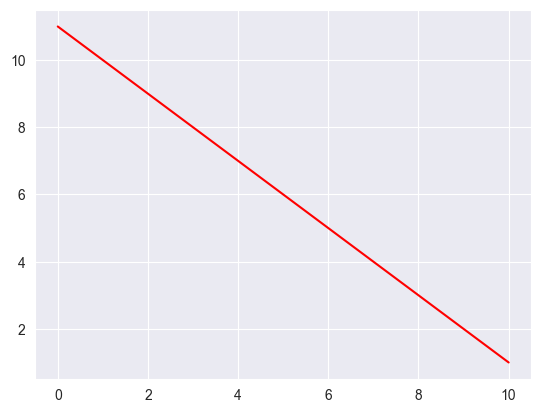

In [5]:
plt.plot(x, y, 'r')

In [6]:
from sklearn.svm import SVC

In [7]:
y = df['Virus Present']

In [8]:
X = df.drop('Virus Present', axis=1)

In [9]:
model = SVC (kernel='linear', C=1_000)

In [10]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [11]:
from svm_margin_plot import plot_svm_boundary

F:\DataSpell\data_science_ml_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


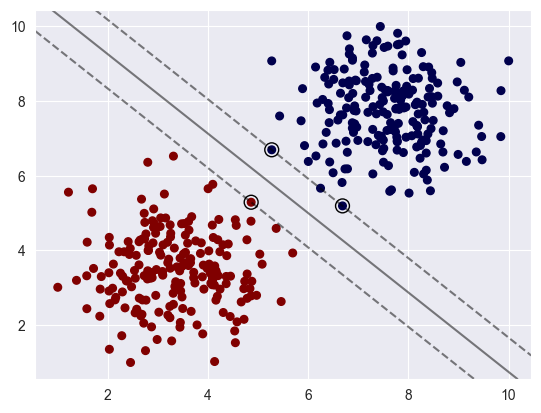

In [12]:
plot_svm_boundary(model, X, y)

# 150. SVM with Scikit-Learn and Python - Classification Part Two

In [13]:
from sklearn.svm import SVC

In [14]:
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

In [15]:
model = SVC(kernel='linear', C=0.05)

In [16]:
model.fit(X, y)

SVC(C=0.05, kernel='linear')

F:\DataSpell\data_science_ml_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


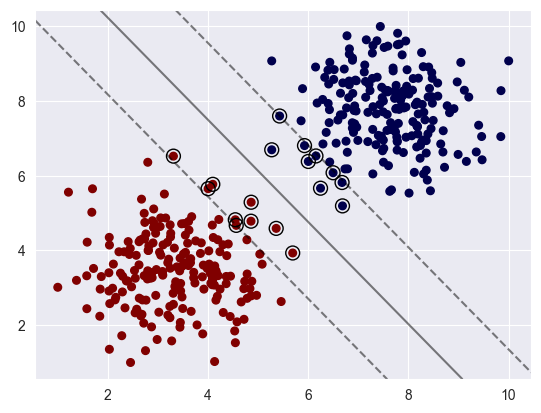

In [17]:
plot_svm_boundary(model, X, y)

In [18]:
model = SVC(kernel='rbf', C=1, gamma=2)

In [19]:
model.fit(X, y)

SVC(C=1, gamma=2)

F:\DataSpell\data_science_ml_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


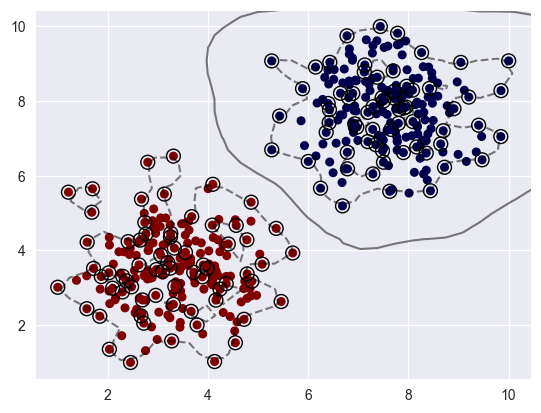

In [20]:
plot_svm_boundary(model, X, y)

In [21]:
model = SVC(kernel='poly', degree=2)

In [22]:
model.fit(X, y)

SVC(degree=2, kernel='poly')

F:\DataSpell\data_science_ml_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


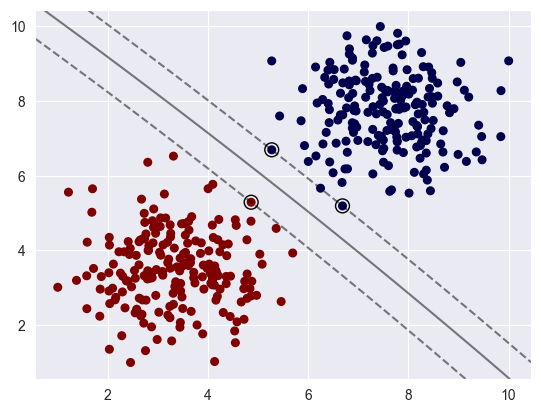

In [23]:
plot_svm_boundary(model, X, y)

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [25]:
svm = SVC()

In [26]:
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

In [27]:
grid = GridSearchCV(svm, param_grid)

In [28]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [29]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

# 151. SVM with Scikit-Learn and Python - Regression

In [30]:
df_path = r'F:\\DataSpell\\data_science_ml_learning\\DATA\\cement_slump.csv'

In [31]:
df = pd.read_csv(df_path)

<Axes: >

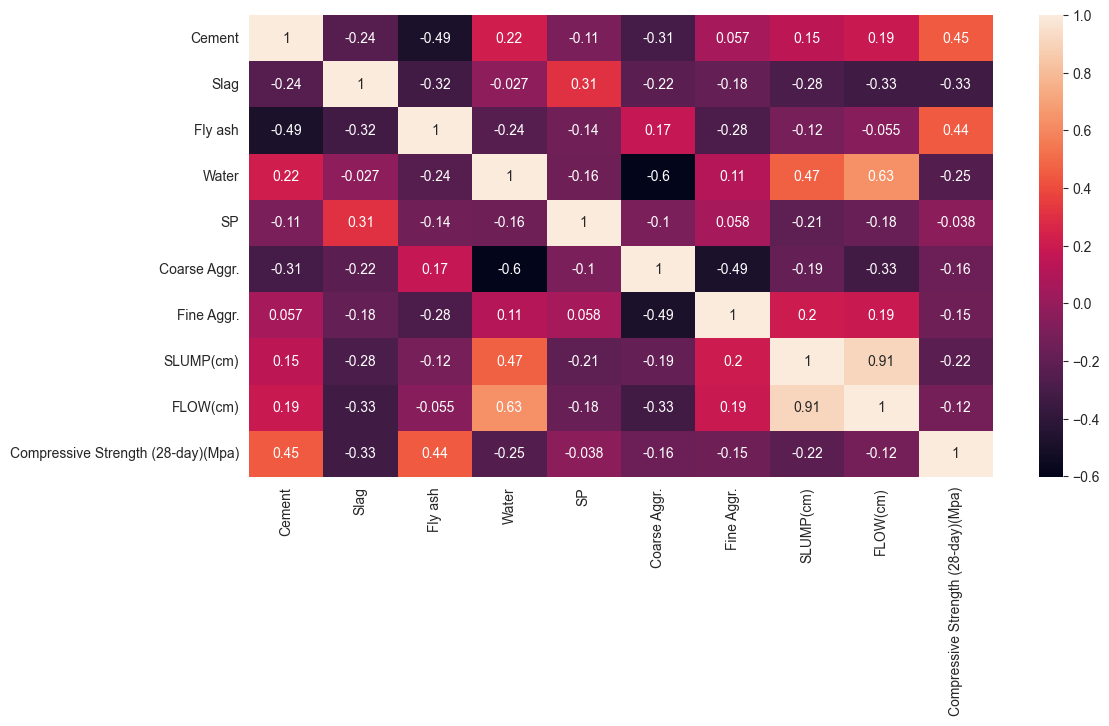

In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)

In [33]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
scaled_X_train = scaler.fit_transform(X_train)

In [40]:
scaled_X_test = scaler.transform(X_test)

In [41]:
from sklearn.svm import SVR

In [42]:
base_model = SVR()

In [43]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [44]:
base_preds = base_model.predict(scaled_X_test)

In [48]:
base_preds

array([33.54538508, 36.88488329, 35.31862535, 34.4982983 , 38.78862684,
       37.28692733, 34.70488018, 37.45383093, 38.5643203 , 40.60987705,
       36.12704821, 33.47125341, 33.80688776, 35.57395401, 39.06389895,
       39.20405978, 38.73343751, 36.38267762, 32.54415537, 34.41850278,
       37.08595015, 35.95245982, 35.172924  , 32.85268464, 38.10884757,
       36.35378576, 34.496466  , 33.01047764, 36.06717968, 35.99982788,
       34.58986779])

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
mean_absolute_error(y_test, base_preds)

5.236902091259178

In [51]:
np.sqrt(mean_squared_error(y_test, base_preds))

6.695914838327133

In [52]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4, 5],
    'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]
}

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
svr = SVR()

In [55]:
grid = GridSearchCV(svr, param_grid)

In [56]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'degree': [2, 3, 4, 5],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [57]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [58]:
grid_preds = grid.predict(scaled_X_test)

In [59]:
grid_preds

array([20.39710091, 38.61832633, 32.55457617, 30.34401581, 46.35663548,
       38.53814843, 33.8672516 , 40.25885413, 37.92017232, 50.0907585 ,
       37.59938866, 31.19047761, 28.9592289 , 35.54472932, 44.64694045,
       46.73478893, 45.60228167, 36.35972701, 31.04354039, 34.3730726 ,
       42.39652393, 39.14709188, 33.71510905, 31.99037892, 49.84740118,
       39.07284116, 30.38381941, 28.99204115, 39.08726461, 32.20584581,
       31.98145726])

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [61]:
mean_absolute_error(y_test, grid_preds)

2.5128012210762365

In [63]:
np.sqrt(mean_squared_error(y_test, grid_preds))

3.178210305119858

In [64]:
mean_squared_error(y_test, grid_preds)

10.10102074357006

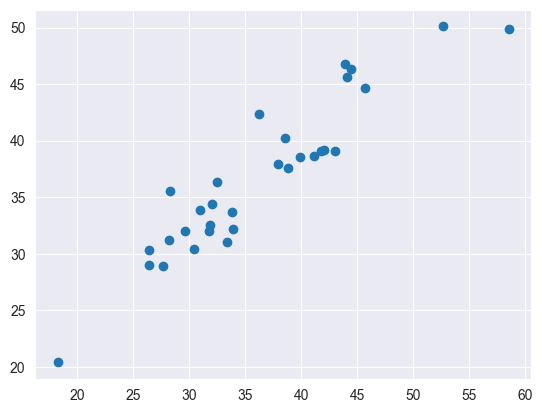